# This notebook contains the Gene Suitability Test for the 2nd orfN-catalyzed reaction (rxn ACGAMT). It contains the following sections:
### Gap-filling
### Min and Max orfN flux limits
### Perturbations through orfN reaction
### PCA (original + annotated)
### orfN reaction flux vs biomass flux

In [1]:
# importing PA14 metabolic model of P. aeruginosa
import cobra
from cobra import Model, Reaction, Metabolite
model = cobra.io.read_sbml_model("iSD1509MModel.xml")
model

Name,iSDXXXX
Memory address,10a8b0b50
Number of metabolites,1642
Number of reactions,2021
Number of genes,1510
Number of groups,7
Objective expression,1.0*BIOMASS_PA14_v27M - 1.0*BIOMASS_PA14_v27M_reverse_0dc58
Compartments,"cytosol, extracellular space, periplasm"


In [2]:
default_bounds = {}
for rs in model.reactions:
    default_bounds[rs.id] = rs.bounds
    
# Making resetting model function
def reset_model(model, def_bounds, obj):
    for rs in model.reactions:
        try:
            rs.bounds = def_bounds[rs.id]
        except KeyError:
            pass
        
        rs.objective_coefficient = 0
        
        if rs.id == obj:
            rs.objective_coefficient = 1

reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')

In [3]:
scfm_medium = {'EX_h2o_e': 1000.0,
              'EX_pi_e': 1000.0,
              'EX_co2_e': 1000.0,
              'EX_fe2_e': 1000.0,
              'EX_glu__L_e': 1000.0,
              'EX_glc__D_e': 1000.0,
              'EX_gly_e': 1000.0,
              'EX_ala__L_e': 1000.0,
              'EX_lys__L_e': 1000.0,
              'EX_asp__L_e': 1000.0,
              'EX_so4_e': 1000.0,
              'EX_arg__L_e': 1000.0,
              'EX_ser__L_e': 1000.0,
              'EX_met__L_e': 1000.0,
              'EX_orn_e': 1000.0,
              'EX_trp__L_e': 1000.0,
              'EX_phe__L_e': 1000.0,
              'EX_h_e': 1000.0,
              'EX_tyr__L_e': 1000.0,
              'EX_cys__L_e': 1000.0,
              'EX_leu__L_e': 1000.0,
              'EX_his__L_e': 1000.0,
              'EX_pro__L_e': 1000.0,
              'EX_val__L_e': 1000.0,
              'EX_lac__D_e': 1000.0,
              'EX_thr__L_e': 1000.0,
              'EX_k_e': 1000.0,
              'EX_no3_e': 1000.0,
              'EX_mg2_e': 1000.0,
              'EX_ile__L_e': 1000.0,
              'EX_na1_e': 1000.0,
              'EX_nh4_e': 1000.0,
              'EX_o2_e': 1000.0}

In [4]:
model.medium = scfm_medium
model.medium

{'EX_glc__D_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_h_e': 1000.0,
 'EX_leu__L_e': 1000.0,
 'EX_ala__L_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_gly_e': 1000.0,
 'EX_ser__L_e': 1000.0,
 'EX_thr__L_e': 1000.0,
 'EX_arg__L_e': 1000.0,
 'EX_lys__L_e': 1000.0,
 'EX_orn_e': 1000.0,
 'EX_asp__L_e': 1000.0,
 'EX_phe__L_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_pro__L_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_glu__L_e': 1000.0,
 'EX_lac__D_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_his__L_e': 1000.0,
 'EX_ile__L_e': 1000.0,
 'EX_met__L_e': 1000.0,
 'EX_no3_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_trp__L_e': 1000.0,
 'EX_tyr__L_e': 1000.0,
 'EX_val__L_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_cys__L_e': 1000.0}

## Gap-filling

In [5]:
# Checking current biomass reaction
biomass_rxn = model.reactions.get_by_id('BIOMASS_PA14_v27M')
print(f"Reaction ID: {biomass_rxn.id}")
print(f"Reaction name: {biomass_rxn.name}")
print(f"Reaction equation: {biomass_rxn.reaction}")
print(f"Lower bound: {biomass_rxn.lower_bound}")
print(f"Upper bound: {biomass_rxn.upper_bound}")
print(f"Objective coefficient: {biomass_rxn.objective_coefficient}")
print(f"Metabolites:")
for metabolite, coefficient in biomass_rxn.metabolites.items():
    print(f"{metabolite.id}: {coefficient}")


Reaction ID: BIOMASS_PA14_v27M
Reaction name: Changed stoichiometry from original (RNA, Glycogen, Formula Wts), scaled
Reaction equation: 0.0002629250362 2fe2s_c + 0.0218082581186 PA_core_lipidA_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 lys__L_c + 0.0904990729257 met__L_c + 0.0002629250362 mlthf_c

In [6]:
-0.0218082581186/2

-0.0109041290593

In [7]:
# Adding LPS B and LPS A to a new biomass reaction
new_biomass_rxn = Reaction(id="BIOMASS_PA14_v27M_LPSA_B")
new_biomass_rxn.name = "Biomass reaction with PA_core_lipidA_c removed and LPS A and LPS B added compared to BIOMASS_PA14_v27M"
new_biomass_rxn.lower_bound = 0.0
new_biomass_rxn.upper_bound = 999999.0
model.add_reactions([new_biomass_rxn])
new_biomass_rxn.add_metabolites({
    'datp_c': -0.0127328513395, 
    'dctp_c': -0.0250500903207, 
    'dgtp_c': -0.0250500903207, 
    'dttp_c': -0.0127328513395,
    'ctp_c': -0.161115895419, 
    'gtp_c': -0.1610581353701, 
    'utp_c': -0.0818728251174, 
    'ala__L_c': -0.5114586280634, 
    'arg__L_c': -0.3347179859799,
    'asn__L_c': -0.1163039750092, 
    'asp__L_c': -0.2337604590002, 
    'cys__L_c': -0.0442179279331, 
    'gln__L_c': -0.266984355176,
    'glu__L_c': -0.1886815390631, 
    'gly_c': -0.367824371436, 
    'his__L_c': -0.095542994587, 
    'ile__L_c': -0.1833822575686, 
    'leu__L_c': -0.545109630509,
    'lys__L_c': -0.1268098853154, 
    'met__L_c': -0.0904990729257, 
    'phe__L_c': -0.1554757214595, 
    'pro__L_c': -0.2231799745834,
    'ser__L_c': -0.2438663808951, 
    'thr__L_c': -0.1851584772934, 
    'trp__L_c': -0.0656048789199, 
    'tyr__L_c': -0.1111131649483,
    'val__L_c': -0.3007573879843, 
    'glycogen_c': -0.1815236055988, 
    'pe160_c': -0.0440332489728, 
    'pe180_c': -0.0019052207574,
    'pe161_c': -0.0186791573555, 
    'pe181_c': -0.0627923456608, 
    'pe_pa_17_0_cyc_c': -0.0012523828755, 
    'pe_pa_19_0_cyc_c': -0.0027845534146,
    'pg160_c': -0.0115620050953, 
    'pg180_c': -0.0003882433662, 
    'pg161_c': -0.0034971315335, 
    'pg181_c': -0.0106413977194, 
    'pg_pa_17_0_cyc_c': -0.0007294269305,
    'pg_pa_19_0_cyc_c': -0.0014588538609, 
    'clpn160_c': -0.0072362236879, 
    'clpn180_c': -0.000348176308, 
    'clpn161_c': -0.0038348089867,
    'clpn181_c': -0.0109468579074, 
    'clpn_pa_17_0_cyc_c': -0.0004942642694, 
    'clpn_pa_19_0_cyc_c': -0.000900875762, 
    'peptido_pa_c': -0.0629017241191,
    'PA_LPS_A_c': -0.0109041290593, 
    'PA_LPS_B_c': -0.0109041290593, 
    'ptrc_c': -0.0760531829063, 
    'q9h2_c': -0.0002629250362, 
    'mlthf_c': -0.0002629250362, 
    'coa_c': -0.0001971967204, 
    'thmpp_c': -0.0002629250362, 
    '2fe2s_c': -0.0002629250362, 
    'atp_c': -70.4958884983908,
    'h2o_c': -66.0234962815776, 
    'h_c': 70.413945350228, 
    'ppi_c': 0.5615558873897, 
    'adp_c': 70.413945350228, 
    'pi_c': 70.413945350228})

In [8]:
# Changing objective function to new biomass reaction
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')

In [9]:
# Checking new biomass reaction
biomass_rxn = model.reactions.get_by_id('BIOMASS_PA14_v27M_LPSA_B')
print(f"Reaction ID: {biomass_rxn.id}")
print(f"Reaction name: {biomass_rxn.name}")
print(f"Reaction equation: {biomass_rxn.reaction}")
print(f"Lower bound: {biomass_rxn.lower_bound}")
print(f"Upper bound: {biomass_rxn.upper_bound}")
print(f"Objective coefficient: {biomass_rxn.objective_coefficient}")
print(f"Metabolites:")
for metabolite, coefficient in biomass_rxn.metabolites.items():
    print(f"{metabolite.id}: {coefficient}")

Reaction ID: BIOMASS_PA14_v27M_LPSA_B
Reaction name: Biomass reaction with PA_core_lipidA_c removed and LPS A and LPS B added compared to BIOMASS_PA14_v27M
Reaction equation: 0.0002629250362 2fe2s_c + 0.0109041290593 PA_LPS_A_c + 0.0109041290593 PA_LPS_B_c + 0.5114586280634 ala__L_c + 0.3347179859799 arg__L_c + 0.1163039750092 asn__L_c + 0.2337604590002 asp__L_c + 70.4958884983908 atp_c + 0.0072362236879 clpn160_c + 0.0038348089867 clpn161_c + 0.000348176308 clpn180_c + 0.0109468579074 clpn181_c + 0.0004942642694 clpn_pa_17_0_cyc_c + 0.000900875762 clpn_pa_19_0_cyc_c + 0.0001971967204 coa_c + 0.161115895419 ctp_c + 0.0442179279331 cys__L_c + 0.0127328513395 datp_c + 0.0250500903207 dctp_c + 0.0250500903207 dgtp_c + 0.0127328513395 dttp_c + 0.266984355176 gln__L_c + 0.1886815390631 glu__L_c + 0.367824371436 gly_c + 0.1815236055988 glycogen_c + 0.1610581353701 gtp_c + 66.0234962815776 h2o_c + 0.095542994587 his__L_c + 0.1833822575686 ile__L_c + 0.545109630509 leu__L_c + 0.1268098853154 l

In [10]:
# Ensuring old biomass reaction is no longer objective function
old_biomass = model.reactions.get_by_id('BIOMASS_PA14_v27M')
old_biomass.objective_coefficient

0.0

## Gene suitability test for orfN reaction #2 - Rxn ACGAMT
### Maximizing flux through rxn ACGAMT

In [11]:
ACGAMT_rxn = model.reactions.get_by_id('ACGAMT')
print(ACGAMT_rxn)

ACGAMT: uacgam_c + udcpp_c --> ump_c + unaga_c


In [12]:
# for rxns in orfN_rxn:
    # reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
model.medium = scfm_medium
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M_LPSA_B.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M_LPSA_B.objective_coefficient = 0
ACGAMT_rxn.objective_coefficient = 1
    
    # Optimize model to maximize flux through rxn
max_flux = model.optimize(objective_sense='maximize')
print(max_flux.objective_value)

max_flux_val = max_flux.objective_value

1.2180176523767607


### Minimizing flux through reaction ACGAMT

In [13]:
# for rxns in reactions_murA:
    #reset model
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
model.medium = scfm_medium
    
    # Limit growth to minimum of 0.05
model.reactions.BIOMASS_PA14_v27M_LPSA_B.bounds = 0.05, 1000

    # Make rxn of interest the objective function
model.reactions.BIOMASS_PA14_v27M_LPSA_B.objective_coefficient = 0
ACGAMT_rxn.objective_coefficient = 1
    
    # Optimize model to minimize flux through rxn
min_flux = model.optimize(objective_sense='minimize')
print(min_flux.objective_value)
    
min_flux_val = min_flux.objective_value

0.0005452064529649999


In [14]:
# State newly determined bounds for reaction
min_flux_val, max_flux_val

(0.0005452064529649999, 1.2180176523767607)

### Perturbations through orfN reaction ACGAMT

In [15]:
import numpy as np
import pandas as pd
my_flux_vals = np.linspace(min_flux_val, max_flux_val, num=400)
my_flux_vals

array([5.45206453e-04, 3.59651584e-03, 6.64782523e-03, 9.69913462e-03,
       1.27504440e-02, 1.58017534e-02, 1.88530628e-02, 2.19043722e-02,
       2.49556816e-02, 2.80069909e-02, 3.10583003e-02, 3.41096097e-02,
       3.71609191e-02, 4.02122285e-02, 4.32635379e-02, 4.63148473e-02,
       4.93661567e-02, 5.24174661e-02, 5.54687754e-02, 5.85200848e-02,
       6.15713942e-02, 6.46227036e-02, 6.76740130e-02, 7.07253224e-02,
       7.37766318e-02, 7.68279412e-02, 7.98792505e-02, 8.29305599e-02,
       8.59818693e-02, 8.90331787e-02, 9.20844881e-02, 9.51357975e-02,
       9.81871069e-02, 1.01238416e-01, 1.04289726e-01, 1.07341035e-01,
       1.10392344e-01, 1.13443654e-01, 1.16494963e-01, 1.19546273e-01,
       1.22597582e-01, 1.25648891e-01, 1.28700201e-01, 1.31751510e-01,
       1.34802820e-01, 1.37854129e-01, 1.40905438e-01, 1.43956748e-01,
       1.47008057e-01, 1.50059366e-01, 1.53110676e-01, 1.56161985e-01,
       1.59213295e-01, 1.62264604e-01, 1.65315913e-01, 1.68367223e-01,
      

In [16]:
# reset objective function to biomass
reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
# Checking objective function
for reactions in model.reactions:
    if reactions.objective_coefficient == 1:
        print(f'The objective function is: {reactions.id}')

The objective function is: BIOMASS_PA14_v27M_LPSA_B


In [17]:
ACGAMT_rxn.bounds = 0.01004757, 0.01004757

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.9214463571880186


In [18]:
# Model flux vector corresponding with this solution
solution.fluxes

solution_df = solution.to_frame()
solution_df = solution_df[solution_df['fluxes'] != 0]
solution_df

,fluxes,reduced_costs
3HAD100,0.467456,3.081488e-33
3HAD120,0.225896,0.000000e+00
3HAD121,0.241559,3.081488e-33
3HAD140,0.145516,0.000000e+00
3HAD141,0.241559,-1.540744e-33
...,...,...
rJB00277,0.010048,1.180335e-31
rxn00295,0.010048,0.000000e+00
EX_glcn_e,8.520283,0.000000e+00
EX_itacon_e,8.429279,0.000000e+00


In [19]:
ACGAMT_rxn.bounds = 0.000545206452965, 0.000545206452965

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

0.05


In [20]:
ACGAMT_rxn.bounds = 0.01724760358873678, 0.01724760358873678

# Optimize model to maximize flux through biomass rxn
# with specific flux through orfN
solution = model.optimize(objective_sense='maximize')
print(solution.objective_value)

1.5817497660692588


In [21]:
# Create empty list to input rows for each orfN flux
row_list = []
# Loop through orfN fluxes to get corresponding network fluxes
for flux in my_flux_vals:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M_LPSA_B')
    # reset_model function doesn't finish running, so leaving it out (shouldn't impact results)
    # Set orfN flux bounds
    ACGAMT_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    row_list.append(solution.fluxes)

matrix_df = pd.DataFrame(row_list)
matrix_df

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project/lib/python3.9/site-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)
/Users/graham/opt/anaconda3/envs/Project

,1PPDCRc,2AGPE140tipp,2AGPE141tipp,2AGPG140tipp,2AGPG141tipp,2DHGLCK,2DHGLCNkt_tpp,2HH24DDH1,2MAHMP,3_4DHBZ1t_pp,...,BIOMASS_PA14_v27M,BIOMASS_PA14_v27M_ANA,PYOO2exNET,AHGDx,SHGO,ACTD2_SS,23DHBSpp,ACPS1,ACPpds,BIOMASS_PA14_v27M_LPSA_B
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.540563,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.050000
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.259122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.329831
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.977682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.609661
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.696241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.889492
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.414800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.169323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-109.670225,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.583102
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-109.952420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,110.862933
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-110.234615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.142763
fluxes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-110.516810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111.422594


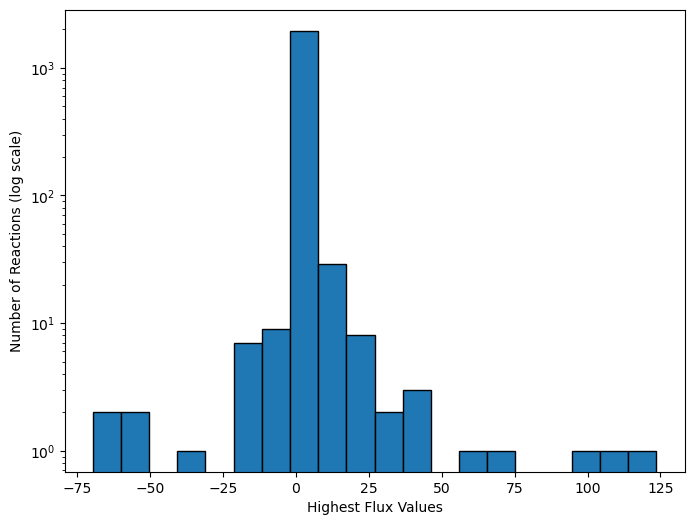

In [28]:
import matplotlib.pyplot as plt
# Get the maximum flux value for each reaction
max_fluxes = matrix_df.max()

# Create a histogram using matplotlib
plt.figure(figsize=(8, 6))
plt.hist(max_fluxes, bins=20, edgecolor='black', log=True)
plt.xlabel('Highest Flux Values')
plt.ylabel('Number of Reactions (log scale)')
plt.show()

In [22]:
print(matrix_df['ACGAMT'])

fluxes    0.000545
fluxes    0.003597
fluxes    0.006648
fluxes    0.009699
fluxes    0.012750
            ...   
fluxes    1.205812
fluxes    1.208864
fluxes    1.211915
fluxes    1.214966
fluxes    1.218018
Name: ACGAMT, Length: 400, dtype: float64


In [23]:
matrix_df = matrix_df.drop('ACGAMT', axis=1)
matrix_df
matrix_df.shape

(400, 2021)

In [24]:
print(matrix_df['ACGAMT'])

KeyError: 'ACGAMT'

In [ ]:
# Adding column of orfN flux values to dataframe for annotation
# orfN1_flux_values = my_flux_vals.tolist()
# orfN1_flux_values

In [ ]:
# matrix_df["orfN Flux Values"] = orfN1_flux_values

In [ ]:
# matrix_df.shape

### PCA

In [ ]:
# Importing PCA class from sklearn
from sklearn.decomposition import PCA

# Fit PCA model to matrix
pca = PCA()
pca.fit(matrix_df)

In [ ]:
# Looking at the principal components formed
components = pca.components_
components

In [ ]:
# Explained variance ratio of each principal component
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

In [ ]:
# Keeping only first 2 principial components
pca_2 = PCA(n_components=2)
pca_2.fit(matrix_df)
print(pca_2.explained_variance_ratio_)

In [ ]:
# Transform original matrix to principal component space
pca_matrix = pca_2.transform(matrix_df)
print(pca_matrix)
pca_matrix.shape

In [ ]:
import matplotlib.pyplot as plt

# Graph first two principal components
x = pca_matrix[:, 0]
y = pca_matrix[:, 1]
plt.scatter(x,y)
plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

In [ ]:
# Adding column of ACGAMT flux values to dataframe for annotation
matrix_df_2 = pd.DataFrame(row_list)
ACGAMT_flux_values = my_flux_vals.tolist()
ACGAMT_flux_values

In [ ]:
matrix_df_2["ACGAMT Flux Values"] = ACGAMT_flux_values
matrix_df_2.shape

In [ ]:
# Dropping original orfN flux column
matrix_df_2 = matrix_df_2.drop('ACGAMT', axis=1)
matrix_df_2
matrix_df_2.shape

In [ ]:
# Fit PCA model to matrix
pca_annot = PCA()
pca_annot.fit(matrix_df_2)

In [ ]:
# Explained variance ratio of each principal component
explained_variance_2 = pca_annot.explained_variance_ratio_
print(explained_variance_2)

In [ ]:
# Keeping only first 2 principial components
pca_annot_2 = PCA(n_components=2)
pca_annot_2.fit(matrix_df_2)
print(pca_annot_2.explained_variance_ratio_)

In [ ]:
# Transform original matrix to principal component space
pca_matrix_annot = pca_annot_2.transform(matrix_df_2)
print(pca_matrix_annot)
pca_matrix_annot.shape

In [ ]:
# Plot the first two principal components
plt.scatter(pca_matrix_annot[:, 0], pca_matrix_annot[:, 1])

# Index for first and last points
annotate_index = [0, -1]

# Annotate first and last points
for i in annotate_index:
    x, y = pca_matrix_annot[i, :]
    plt.annotate(ACGAMT_flux_values[i], (x, y))
    
# Index for min y value
min_y_value = pca_matrix[:, 1].argmin()

# Annotate point with min y value
x, y = pca_matrix_annot[min_y_value, :]
plt.annotate(ACGAMT_flux_values[min_y_value], (x, y))

plt.xlabel("P.C. 1")
plt.ylabel("P.C. 2")
plt.show()

#### P.C. 1 seems negatively correlated with growth. P.C. 2 is neglibible because the axis is so small.

### Graph orfN Rxn ACGAMT Fluxes vs. Resulting Biomass Function

In [ ]:
ACGAMT_growth_df = pd.DataFrame()
ACGAMT_growth_df["ACGAMT Fluxes"] = ACGAMT_flux_values
ACGAMT_growth_df

In [ ]:
# Create empty list to input growth values for each orfN flux
growth_list = []
# Loop through orfN fluxes to get corresponding growth values
for flux in ACGAMT_flux_values:
    # Reset model
    # reset_model(model, default_bounds, 'BIOMASS_PA14_v27M')
    # Set orfN flux bounds
    ACGAMT_rxn.bounds = flux, flux
    solution = model.optimize(objective_sense='maximize')
    growth_list.append(solution.objective_value)
growth_list

In [ ]:
# Add growth list to dataframe
ACGAMT_growth_df["Growth Values"] = growth_list
ACGAMT_growth_df

In [ ]:
plt.plot(ACGAMT_growth_df["ACGAMT Fluxes"], ACGAMT_growth_df["Growth Values"])
plt.xlabel("ACGAMT Fluxes")
plt.ylabel("Growth Values")
plt.show()